# Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [10]:
df = pd.read_csv('My Uber Drives - 2016.csv')

In [11]:
df.shape

(1156, 7)

In [12]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [13]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [33]:
df.info

<bound method DataFrame.info of               START_DATE            END_DATE  CATEGORY             START  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business       Fort Pierce   
1    2016-01-02 01:25:00 2016-01-02 01:37:00  Business       Fort Pierce   
2    2016-01-02 20:25:00 2016-01-02 20:38:00  Business       Fort Pierce   
3    2016-01-05 17:31:00 2016-01-05 17:45:00  Business       Fort Pierce   
4    2016-01-06 14:42:00 2016-01-06 15:49:00  Business       Fort Pierce   
...                  ...                 ...       ...               ...   
1150 2016-12-31 01:07:00 2016-12-31 01:14:00  Business           Kar?chi   
1151 2016-12-31 13:24:00 2016-12-31 13:42:00  Business           Kar?chi   
1152 2016-12-31 15:03:00 2016-12-31 15:38:00  Business  Unknown Location   
1153 2016-12-31 21:32:00 2016-12-31 21:50:00  Business        Katunayake   
1154 2016-12-31 22:08:00 2016-12-31 23:51:00  Business           Gampaha   

                  STOP  MILES          PURPOSE  TIME_DA

# Data Cleaning

In [34]:
df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

df.dropna(inplace = True)

df.isnull().sum()

START_DATE              0
END_DATE                0
CATEGORY                0
START                   0
STOP                    0
MILES                   0
PURPOSE                 0
TIME_DAY                0
TIME_OF_DAY             0
MONTH_OF_THE_RIDE       0
DAY_OF_THE_RIDE         0
DURATION_OF_THE_RIDE    0
dtype: int64


# Data Preprocessing

In [16]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])


df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = pd.cut(x = df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)


df['MONTH_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.month)
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].map(month_label)

df['DAY_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['DAY_OF_THE_RIDE'] = df['DAY_OF_THE_RIDE'].map(day_label)


df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']).astype('timedelta64[m]')

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0


In [18]:
df.describe()

,MILES,TIME_DAY,DURATION_OF_THE_RIDE
count,1155.000000,1155.000000,1155.000000
mean,10.566840,14.696104,23.243290
std,21.579106,4.575226,27.318277
min,0.500000,0.000000,0.000000
25%,2.900000,12.000000,10.000000
50%,6.000000,15.000000,16.000000
75%,10.400000,18.000000,27.500000
max,310.300000,23.000000,336.000000


In [19]:
print('Min Timestamp in START_TIME is - {}'.format(df['START_DATE'].min()))
print('Max Timestamp in START_TIME is - {}'.format(df['START_DATE'].max()))

Min Timestamp in START_TIME is - 2016-01-01 21:11:00
Max Timestamp in START_TIME is - 2016-12-31 22:08:00


In [35]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))

Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 11
Total number of unique location in START - 175
Total number of unique location in STOP - 186


# Data Visualization

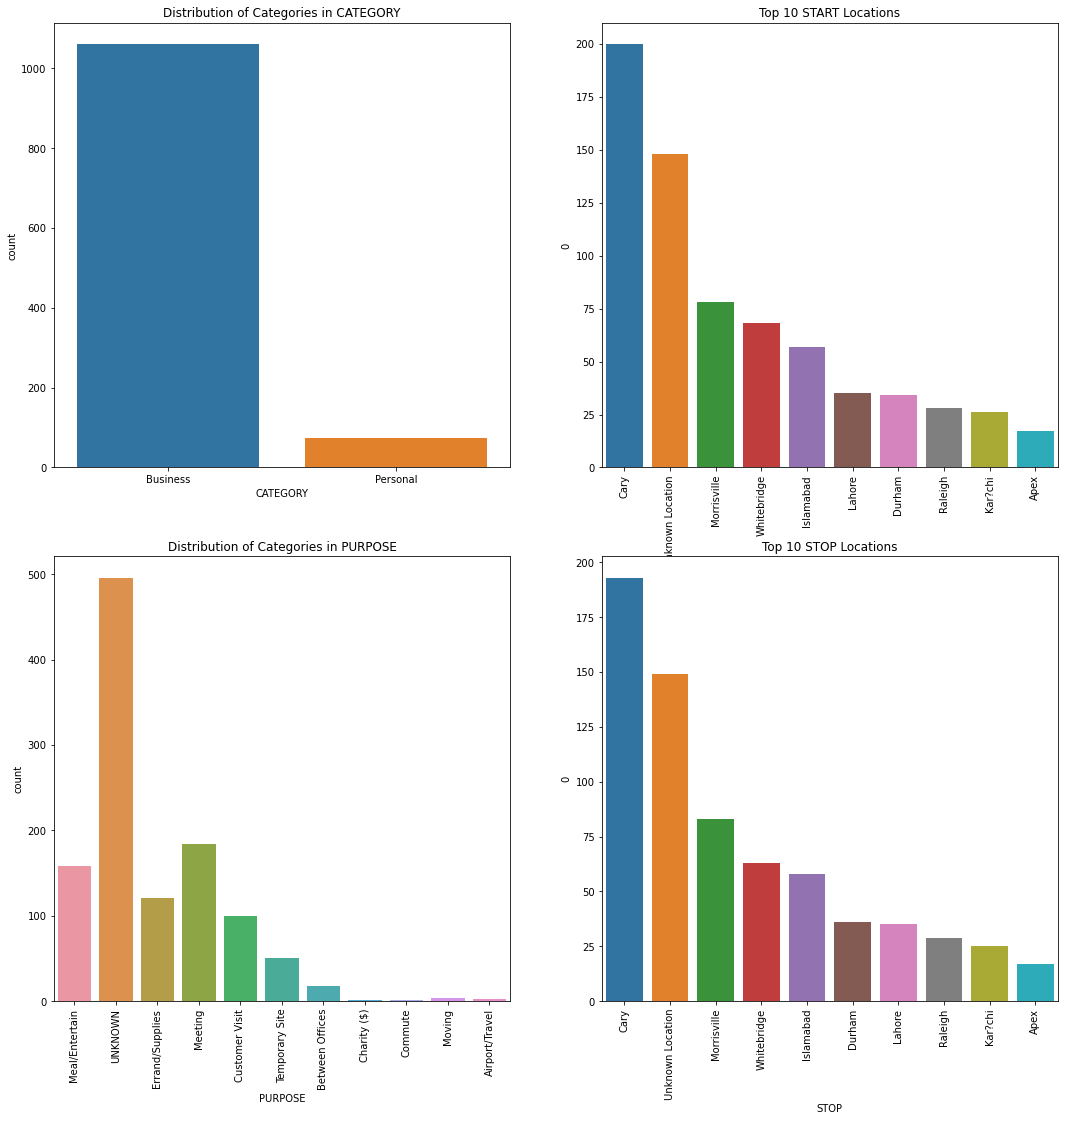

In [36]:
fig, axes = plt.subplots(2, 2, figsize = (18,18))


sns.countplot(x=df['CATEGORY'], ax = axes[0,0])
axes[0, 0].set_title('Distribution of Categories in CATEGORY')


sns.countplot(x=df['PURPOSE'], ax = axes[1,0])
axes[1, 0].set_title('Distribution of Categories in PURPOSE')
axes[1, 0].tick_params(axis='x', rotation = 90)


temp = pd.DataFrame(df.groupby('START').size()).nlargest(10, columns = 0).reset_index(drop = False)
sns.barplot(x = 'START', y = 0, data = temp, ax = axes[0,1])
axes[0, 1].set_title('Top 10 START Locations')
axes[0, 1].tick_params(axis='x', rotation = 90)

temp = pd.DataFrame(df.groupby('STOP').size()).nlargest(10, columns = 0).reset_index(drop = False)
sns.barplot(x = 'STOP', y = 0, data = temp, ax = axes[1,1])
axes[1, 1].set_title('Top 10 STOP Locations')
axes[1, 1].tick_params(axis='x', rotation = 90)

<AxesSubplot:xlabel='TIME_OF_DAY', ylabel='count'>

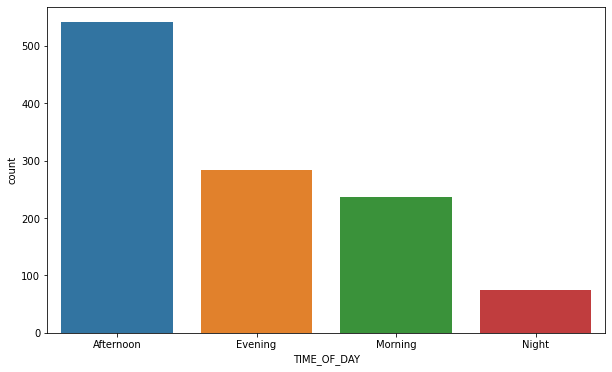

In [37]:
plt.figure(figsize = (10,6))
sns.countplot(x=df['TIME_OF_DAY'])

<AxesSubplot:xlabel='MONTH_OF_THE_RIDE', ylabel='count'>

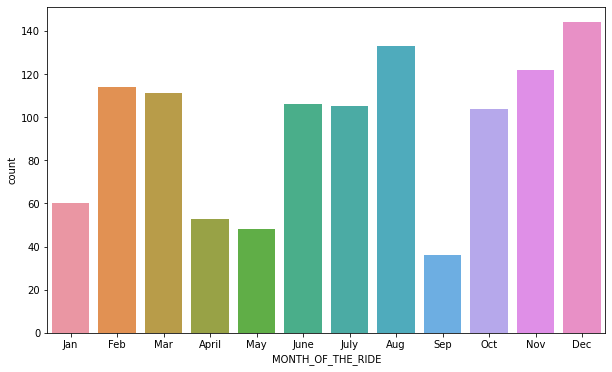

In [38]:
plt.figure(figsize = (10,6))
sns.countplot(x=df['MONTH_OF_THE_RIDE'])

<AxesSubplot:xlabel='DAY_OF_THE_RIDE', ylabel='count'>

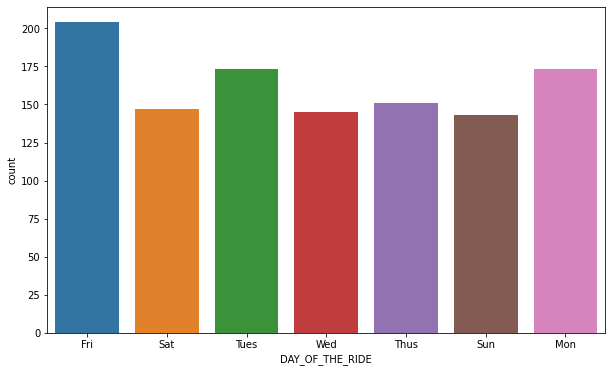

In [39]:
plt.figure(figsize = (10,6))
sns.countplot(x=df['DAY_OF_THE_RIDE'])

<AxesSubplot:xlabel='MONTH_OF_THE_RIDE', ylabel='DURATION_OF_THE_RIDE'>

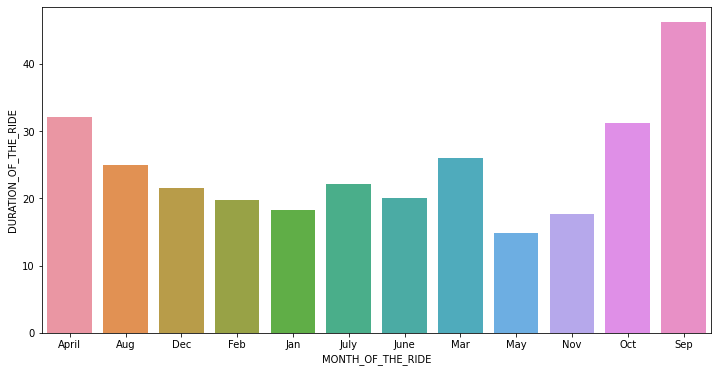

In [40]:
plt.figure(figsize = (12,6))
temp = df.groupby('MONTH_OF_THE_RIDE')['DURATION_OF_THE_RIDE'].mean().reset_index()
sns.barplot(x = 'MONTH_OF_THE_RIDE', y = 'DURATION_OF_THE_RIDE', data = temp)